In [1]:
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import requests as rq
import pandas as pd
import numpy as np
import math
import json
import bs4
import re

import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from sqlalchemy import create_engine

with open("C:/open_data_key.txt", 'r', encoding='utf-8') as f:
    data_key = f.readlines()
ServiceKey = data_key[0][:-1]
connection_string = data_key[1]

engine = create_engine(connection_string, encoding='utf-8', echo=False)

In [3]:
df_train = pd.read_csv("C:/crop_data/2018010120181231.csv")
df = df_train.copy()

In [4]:
df_train.shape

(470234, 44)

## 가격 분포 확인

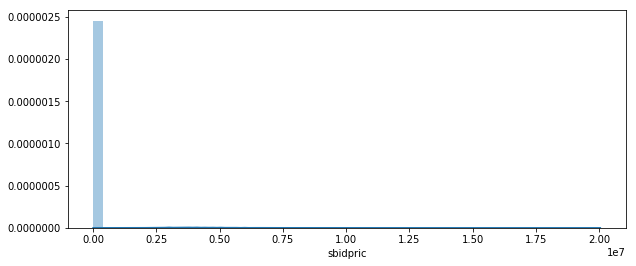

In [5]:
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(df_train['sbidpric'])

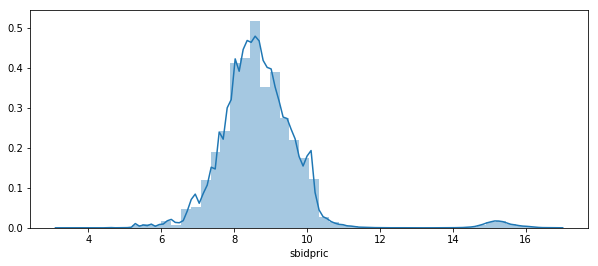

In [6]:
# 로그스케일링 histogram
f, ax = plt.subplots(figsize=(10, 4))
sns.distplot(np.log1p(df_train['sbidpric']))

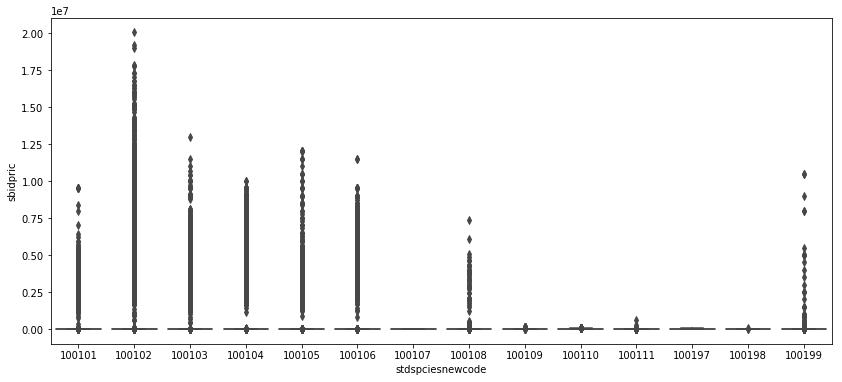

In [7]:
data = pd.concat([df_train['sbidpric'], df_train['stdspciesnewcode']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='stdspciesnewcode', y="sbidpric", data=data)

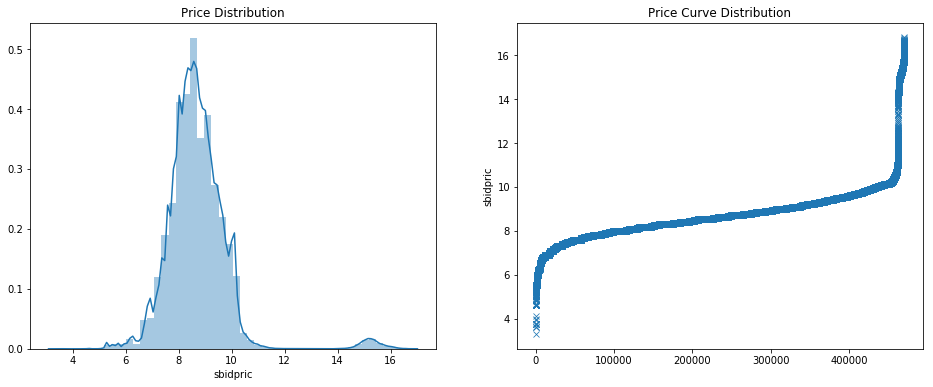

In [8]:
f, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.distplot(np.log1p(df_train['sbidpric']), ax=ax[0])
ax[0].set_title('Price Distribution')
plt.xlim()

sns.scatterplot(range(df_train.shape[0]), np.log1p(df_train['sbidpric']).sort_values(), ax=ax[1], marker="x")
ax[1].set_title('Price Curve Distribution')
plt.show()

## 코드 분포

In [9]:
# 단위코드
df_train[['stdunitnewcode','stdunitnewnm']].sort_values(by=['stdunitnewcode']).drop_duplicates()

,stdunitnewcode,stdunitnewnm
49552,11,g
311568,12,kg
113987,13,ton


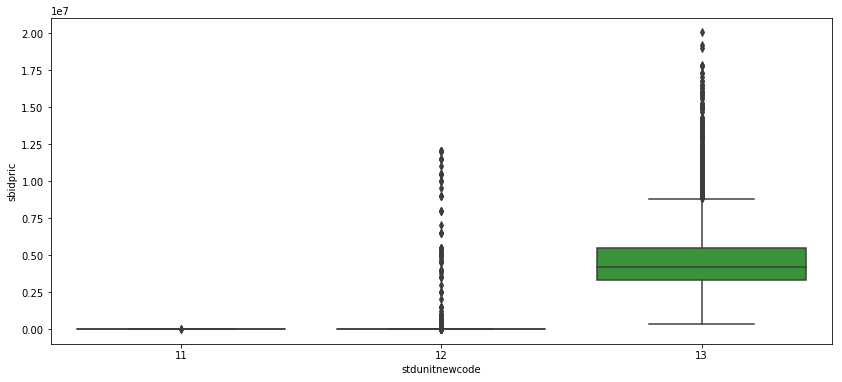

In [10]:
# 단위 분포
data = pd.concat([df_train['sbidpric'], df_train['stdunitnewcode']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x='stdunitnewcode', y="sbidpric", data=data)

## 날짜 별로 가격 추이 확인

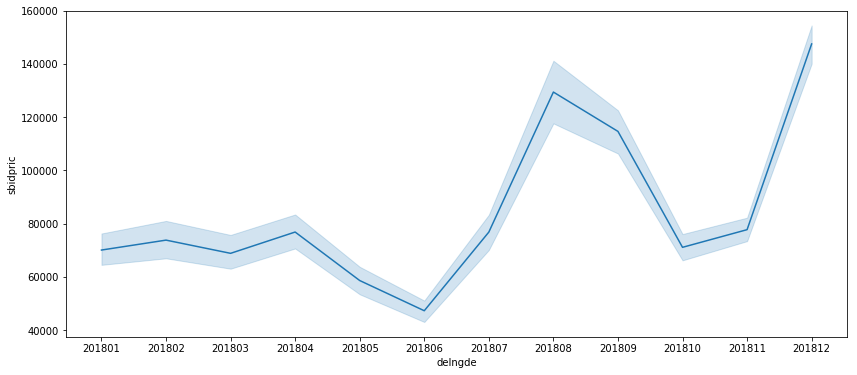

In [11]:
dt = df[['delngde','sbidpric']]

dt['delngde'] = dt['delngde'].apply(lambda x : str(x)[0:6])

# dt = dt.groupby(['delngde'], as_index=False)['sbidpric'].mean()

# data = pd.concat([df_train['sbidpric'], df_train['sbidpric']], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.lineplot(x='delngde', y="sbidpric", data=dt)

#### 2015-2018 통합 추세 확인

In [12]:
df1 = pd.read_csv("C:/crop_data/2015010120151231.csv")
df2 = pd.read_csv("C:/crop_data/2016010120161231.csv")
df3 = pd.read_csv("C:/crop_data/2017010120171231.csv")
df4 = pd.read_csv("C:/crop_data/2018010120181231.csv")
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(461926, 44)
(485004, 44)
(515045, 44)
(470234, 44)


In [13]:
def aaaa(df):
    dt = df[['delngde','sbidpric']]
    dt['delngde'] = df['delngde'].apply(lambda x : str(x)[0:6])
    dt['year'] = df['delngde'].apply(lambda x : str(x)[0:4])
    dt['month'] =  df['delngde'].apply(lambda x : str(x)[4:6])
    return dt

In [14]:
df2015_2018 = aaaa(df1)
df2015_2018 = df2015_2018.append(aaaa(df2))
df2015_2018 = df2015_2018.append(aaaa(df3))
df2015_2018 = df2015_2018.append(aaaa(df4))

In [15]:
# 오류 떠서 변환시켜줌
df2015_2018['year'] = df2015_2018['year'].apply(int)

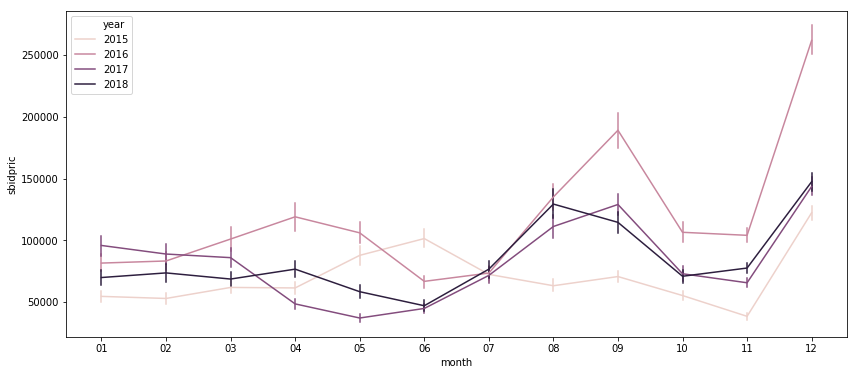

In [16]:
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.lineplot(x="month", y="sbidpric", hue="year", err_style="bars", data=df2015_2018)

## 날짜별 물량 정보 확인

In [17]:
df4[(df4['delngde']==20180127) & (df4['aucsecode']==2)]

,aucsecode,aucsenm,catgorycode,catgorynewcode,catgorynewnm,catgorynm,cprinsttcode,cprinsttnewcode,cprmtccode,cpruseprdlstcode,...,stdspciescode,stdspciesnewcode,stdspciesnewnm,stdspciesnm,stdunitnewcode,stdunitnewnm,whsalmrktcode,whsalmrktnewcode,whsalmrktnewnm,whsalmrktnm
28780,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28781,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28842,2,정가수의,10,10,엽경채류,엽경채류,11000103,6005604,537000,NaN,...,100101,100101,봄배추,봄배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28877,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28878,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28894,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28895,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28896,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28897,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28898,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장


In [18]:
df4[(df4['delngde']==20180127) & (df4['aucsecode']==2)]

,aucsecode,aucsenm,catgorycode,catgorynewcode,catgorynewnm,catgorynm,cprinsttcode,cprinsttnewcode,cprmtccode,cpruseprdlstcode,...,stdspciescode,stdspciesnewcode,stdspciesnewnm,stdspciesnm,stdunitnewcode,stdunitnewnm,whsalmrktcode,whsalmrktnewcode,whsalmrktnewnm,whsalmrktnm
28780,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28781,2,정가수의,10,10,엽경채류,엽경채류,11000102,6005607,476000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28842,2,정가수의,10,10,엽경채류,엽경채류,11000103,6005604,537000,NaN,...,100101,100101,봄배추,봄배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28877,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28878,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,534000,NaN,...,100109,100109,우거지,우거지,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28894,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28895,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28896,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28897,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장
28898,2,정가수의,10,10,엽경채류,엽경채류,11000106,6005609,585000,NaN,...,100108,100108,쌈(알배기)배추,쌈배추,12,kg,110001,1005601,가락동농수산물시장,서울가락도매시장


In [19]:
ddd = df3[(df3['delngde']>=20170401) & (df3['delngde']<=20170430)]

In [20]:
ddd.to_csv("asd.csv", index=False, encoding='utf-8-sig')